In [265]:
#https://towardsdatascience.com/report-is-too-long-to-read-use-nlp-to-create-a-summary-6f5f7801d355
import nltk
#nltk.download('stopwords')
#nltk.download('punkt')
import re
import heapq
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [266]:
with open('test.txt', 'r', encoding='utf8') as f:
    file_data = f.read()
text = file_data
text = re.sub(r'\[[0-9]*\]',' ',text)
text = re.sub(r'\s+',' ',text)

In [268]:
clean_text = text.lower()
regex_patterns = [r'\W',r'\d',r'\s+']
for regex in regex_patterns:
    clean_text = re.sub(regex,' ',clean_text)

In [269]:
sentences = nltk.sent_tokenize(text)
stop_words = nltk.corpus.stopwords.words('english')

In [271]:
word_count = {}
for word in nltk.word_tokenize(clean_text):
    if word not in stop_words:
        if word not in word_count.keys():
            word_count[word] = 1
        else:
            word_count[word] += 1

<AxesSubplot:>

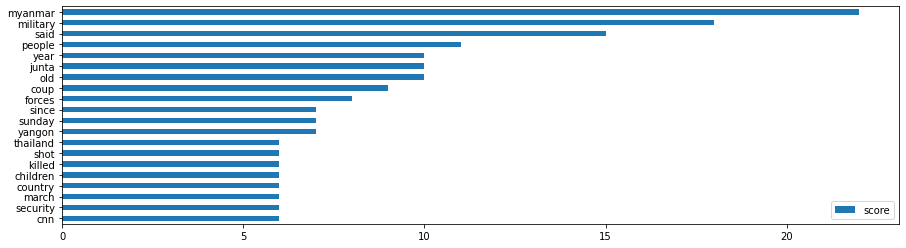

In [297]:
word_count_table = pd.DataFrame.from_dict(word_count, orient = 'index').rename(columns={0: 'score'})
word_count_table.sort_values(by='score').tail(20).plot(kind='barh', figsize=(15,4))

In [289]:
sentence_score = {}to form sentence score
for sentence in sentences:
    for word in nltk.word_tokenize(sentence.lower()):
        if word in word_count.keys():
            if len(sentence.split(' ')) < 30:
                if sentence not in sentence_score.keys():
                    sentence_score[sentence] = word_count[word]
                else:
                    sentence_score[sentence] += word_count[word]

In [290]:
df_sentence_score = pd.DataFrame.from_dict(sentence_score, orient = 'index').rename(columns={0: 'score'})
df_sentence_score.sort_values(by='score', ascending = False).head()

,score
"""Words of condemnation or concern are frankly ringing hollow to the people of Myanmar while the military junta commits mass murder against them,"" he said in a statement.",92
"These were the latest child casualties on the bloodiest day in Myanmar since the military takeover,"" said UNICEF Executive Director Henrietta Fore in a statement.",80
The United Nations Children's Fund (UNICEF) said 35 children have been killed by junta forces since the coup.,74
"The Karen National Union (KNU), the armed ethnic group that controls the southeastern region in Myanmar, told CNN that more airstrikes were conducted by the junta Sunday.",73
"United States President Joe Biden joined a chorus of international condemnation Sunday, saying the situation in Myanmar was ""terrible,"" and described the actions of the military as ""absolutely outrageous.""",72


In [291]:
best_sentences = heapq.nlargest(3, sentence_score, key=sentence_score.get)

In [292]:
print('SUMMARY')
print('------------------------')
for sentence in sentences:
    if sentence in best_sentences:
        print (sentence)

SUMMARY
------------------------
The United Nations Children's Fund (UNICEF) said 35 children have been killed by junta forces since the coup.
These were the latest child casualties on the bloodiest day in Myanmar since the military takeover," said UNICEF Executive Director Henrietta Fore in a statement.
"Words of condemnation or concern are frankly ringing hollow to the people of Myanmar while the military junta commits mass murder against them," he said in a statement.
